# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [35]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [36]:
sinasc.loc[(sinasc['APGAR5'] >= 8), "Classificação APGAR5"] = 'Normal'
sinasc.loc[(sinasc['APGAR5'] >= 6.0) & (sinasc['APGAR5'] <= 7.0), "Classificação APGAR5"] = 'Asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 4.0) & (sinasc['APGAR5'] <= 5.0), "Classificação APGAR5"] = 'Asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] <= 3), "Classificação APGAR5"] = 'Asfixia grave'


In [37]:
sinasc[['APGAR5','Classificação APGAR5']]

,APGAR5,Classificação APGAR5
0,10.0,Normal
1,9.0,Normal
2,10.0,Normal
3,10.0,Normal
4,10.0,Normal
...,...,...
27023,9.0,Normal
27024,9.0,Normal
27025,10.0,Normal
27026,9.0,Normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

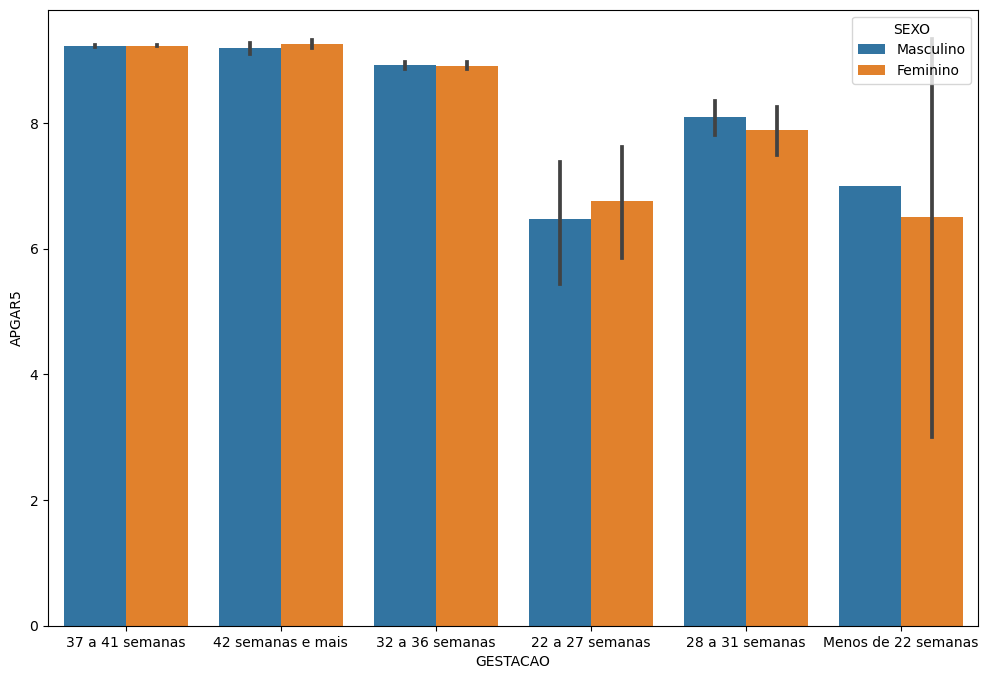

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO',y='APGAR5',hue = 'SEXO', data=sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [39]:
tabela = pd.crosstab(sinasc['GESTACAO'], sinasc['Classificação APGAR5'])
tabela

Classificação APGAR5,Asfixia grave,Asfixia leve,Asfixia moderada,Normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


<Axes: xlabel='Classificação APGAR5', ylabel='GESTACAO'>

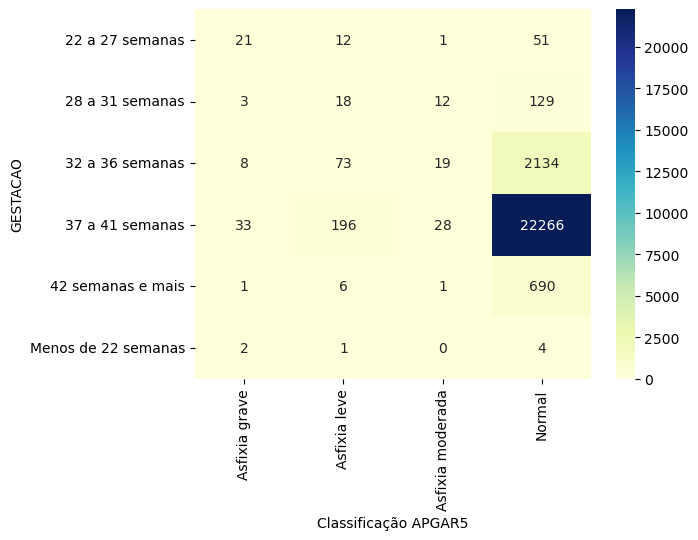

In [40]:
sns.heatmap(tabela, cmap="YlGnBu", annot=True, fmt="d")


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [22]:
percentuais_tabela = tabela.apply(lambda linha: linha / linha.sum() * 100, axis=1)
percentuais_tabela

Classificação APGAR5,Asfixia grave,Asfixia leve,Asfixia moderada,Normal
GESTACAO,,,,
22 a 27 semanas,24.705882,14.117647,1.176471,60.000000
28 a 31 semanas,1.851852,11.111111,7.407407,79.629630
32 a 36 semanas,0.358102,3.267681,0.850492,95.523724
37 a 41 semanas,0.146517,0.870222,0.124317,98.858944
42 semanas e mais,0.143266,0.859599,0.143266,98.853868
Menos de 22 semanas,28.571429,14.285714,0.000000,57.142857


<Axes: xlabel='Classificação APGAR5', ylabel='GESTACAO'>

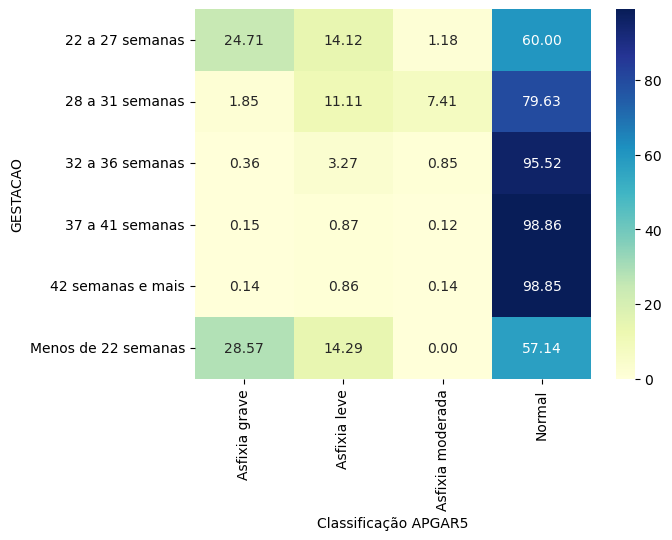

In [41]:
sns.heatmap(percentuais_tabela, cmap="YlGnBu", annot=True, fmt=".2f")


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

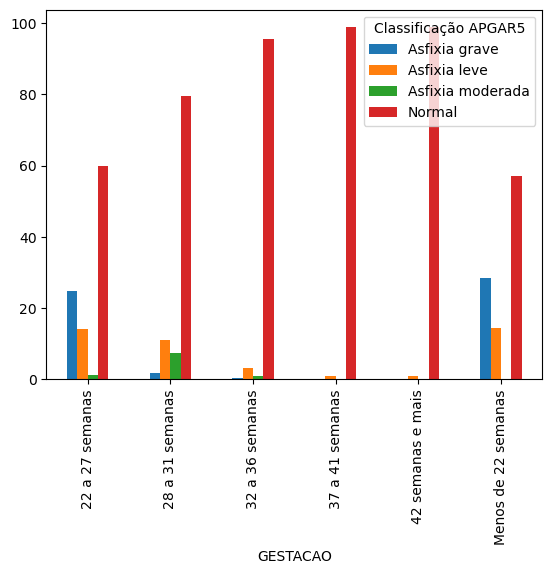

In [29]:
percentuais_tabela.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='PESO', ylabel='APGAR5'>

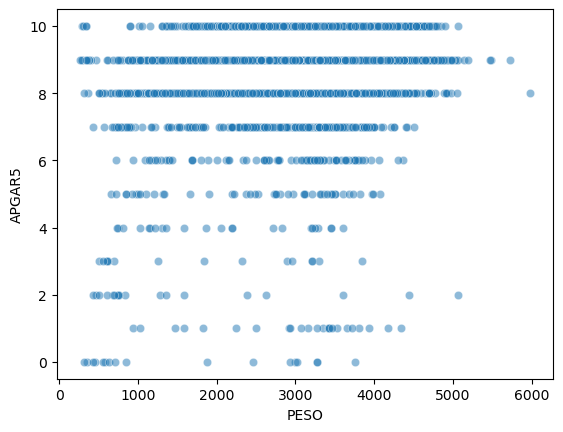

In [42]:
sns.scatterplot(x = 'PESO', y = 'APGAR5', data = sinasc, alpha = .5 )